In [1]:

from solution import Solution
from basis import Basis
import itertools
import numpy as np

power = 5

def dir(point: np.array) -> np.array:
            direction = (np.abs(point) == 1) * (np.sign(point)) 
            return np.array(direction, dtype=int)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

params = {
    'n_dims': 2,
    'dim_sizes': np.array([2, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}
sol = Solution(**params)

connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

border_points = np.array([[-1, 0.5], #[1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], #[1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

w = (sol.steps[0]/2)

eps = 0.1
def phi(point):
    t,x = point
    return x**2

def phi_x(point):
    t,x = point
    return 2*x

def H_q(phi):
    return phi**2

def H_q_x(phi):
    return 2*phi


colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) - H_q(phi(x))*u_bas([0,1]) - H_q_x(phi(x)) * phi_x(x)*u_bas([0,0])) * w*2]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]


border_weight = 100
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]

def initial_state(point):
    t, x = point
    if x < 0.5:
        return 2*x
    else:
        return 2*(1-x)

border_right_operators = [lambda u, _, x, x_loc: 0 + int(x[0]==0) * initial_state(x) * border_weight,
                            # lambda u, _, x, x_loc: 0 * w
                            ]
border_ops = [border_left_operators, border_right_operators]

points = (colloc_points, connect_points, border_points)

connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)) + np.sum(dir(x_loc)) * u_bas(dir(x_loc)) * w,
                        lambda _, u_bas, x, x_loc: u_bas(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_bas(3*dir(x_loc))* w**3
                        ]
connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)) + np.sum(dir(x_loc))*u_nei(dir(x_loc))* w,
                            lambda _, u_nei, x, x_loc: u_nei(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_nei(3*dir(x_loc))* w**3
                            ]

# connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)),
                        # lambda _, u_bas, x, x_loc: u_bas(dir(x_loc))* w
                        
# connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)),
                            # lambda _, u_nei, x, x_loc: u_nei(dir(x_loc))* w
                            # ]
                            
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'connect_ops':connect_ops}

sol.solve(verbose = True, **iteration_dict)

0.74372396071707
0.40740059961532393
0.2530427395805288
0.1374686204090978
0.06315741058024116
0.055120701894360614
0.02663297285698181
0.02111446854492298
0.012138456014568507
0.008323462973229256
0.005325433453330328
0.003275969209641222
0.0023407126806868636
0.0013023577544991358
0.001001461537333664
0.0005367790053786292
0.0004335474773410382
0.00022791347944728368
0.00018436400849033258
9.494210851146434e-05
7.943774042892446e-05
4.1324493260108675e-05
3.4322492059205706e-05
1.7333987771706028e-05
1.485551849042012e-05
7.751532228307935e-06
5.895975459399572e-06
3.5977304510893034e-06
2.52470655877725e-06
1.6322953430597965e-06
1.0360703514104627e-06
6.951864298199249e-07
3.940213534336934e-07
3.1936172615156314e-07
1.5594986224609642e-07
1.3188621116630266e-07
7.219448680127923e-08
5.12762895640457e-08
3.3054963219716904e-08
2.213693397708406e-08
1.348504615925842e-08
8.582803250684263e-09
6.394980775503191e-09
3.24036175669562e-09
2.682651724676341e-09
1.4555035484156709e-09
9.9

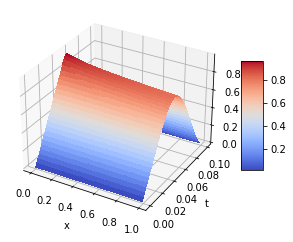

In [2]:
sol.plot2d()

In [3]:
n=100
x_lims = None
y_lims = None
func = np.zeros((n,n))
if x_lims == None:
    x_lims = sol.area_lims[0]
if y_lims == None:
    y_lims = sol.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[i, j] = sol.eval([ax1[i], ax2[j]], [0,0])

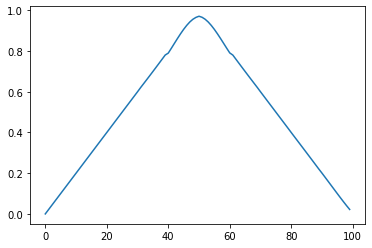

In [4]:
import matplotlib.pyplot as plt
plt.plot(func[0])

In [5]:
rho = sol
import copy

phi = copy.deepcopy(sol)
phi.cells_coefs *= 0

# for i in range(phi.dim_sizes[0]):
#     for j in range(phi.dim_sizes[1]):
#         phi.cells_coefs[i,j,0,2] = 2




In [6]:
# SET ACCURATE PHI

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}
phi = Solution(**params)

connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])

border_points = np.array([#[-1, 0.5], #[1, 0.5],
                            [0.5, -1],# [0.5, 1],
                            #[-1, -0.5], #[1, -0.5],
                            [-0.5, -1],# [-0.5, 1],
                            ])

w = (sol.steps[0]/2)

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: u_bas([0,0])]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: x[1]**2]
colloc_ops = [colloc_left_operators, colloc_right_operators]


border_weight = 100
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]
border_right_operators = [lambda u, _, x, x_loc: 0 #+ int(x[0]==0) * initial_state(x) * border_weight,
                            # lambda u, _, x, x_loc: 0 * w
                            ]
border_ops = [border_left_operators, border_right_operators]

points = (colloc_points, connect_points, border_points)

# connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)),
#                         lambda _, u_bas, x, x_loc: u_bas(dir(x_loc))* w
#                         ]
# connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)),
#                             lambda _, u_nei, x, x_loc: u_nei(dir(x_loc))* w]
                            
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

phi.solve(verbose = True, **iteration_dict)

1.0023944999577186
0.8610492738540092
0.28139811646722845
0.05472705857569384
0.01281298372655309
0.0029648742718107047
0.000688668714794121
0.00016066158324387912
3.7561389487348564e-05
8.786361279309002e-06
2.0551592418139805e-06
4.806320583589076e-07
1.1239366571156561e-07
2.6282182305452358e-08
6.145871703237693e-09
1.4371744989923177e-09
3.360758411465971e-10
7.858964275371133e-11
Iterations to converge:  17


Inverse problem solving

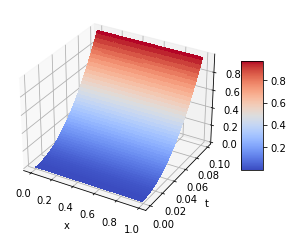

In [7]:
phi.plot2d()

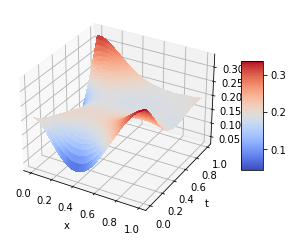

In [27]:
def generate_sys(h_points, h_pow, phi, rho):
    
    def f(x):
        return 0
    
    phi_pow = h_pow

    h_mat_l = np.zeros((h_pow, h_pow))
    phi_h_mat_l = np.zeros((phi_pow, phi_pow))

    h_mat = np.zeros((len(h_points),h_pow* h_pow))
    phi_h_mat = np.zeros((len(h_points),phi_pow* phi_pow))

    right_side_h = np.zeros(len(h_points))
    right_side_phi = np.zeros(len(h_points))

    for point_num in range(len(h_points)):
        point = h_points[point_num]
        t, x = point

        PHI = lambda der: phi.eval(point=point, derivatives=der)
        RHO = lambda der: rho.eval(point=point, derivatives=der)
        
        for i in range(1,h_pow):
            for j in range(h_pow-i):
                if i > 1:
                    h_mat_l[i, j] = i * RHO([0,0])**j * \
                        (RHO([0,1])*(1+j)*PHI([0,1])**(i-1) + (i-1)*RHO([0,0])*PHI([0,2])*PHI([0,1])**(i-2))
                else:
                    h_mat_l[i, j] = RHO([0,0])**j * RHO([0,1])*(1+j)
                #h_mat_l[i, j] =   #i*(PHI( [0,1]))**(i-2) * RHO(, [0,0])**j * \
                    #( (i-1)*(PHI( [0,2]))**(i-1) * RHO(, [0,0])**j + (PHI( [0,2]))**(i) * RHO(, [0,1])**(j+1))
        h_mat[point_num] = copy.deepcopy(h_mat_l.ravel())
        # print(h_mat[point_num])
        
        right_side_h[point_num] = f(point) + RHO([1,0]) - eps * RHO([0,2])

        for i in range(h_pow):
            for j in range(h_pow-i):
                # phi_phi_mat_l[i, j] =  -(j*(x**i * t**(j-1)))
                # if i > 1:
                #     phi_phi_mat_l[i, j] -=  eps * i*(i-1)*x**(i-2) * t**j
                
                phi_h_mat_l[i,j] = PHI([0,1])**i * RHO([0,0])**j
        # phi_phi_mat[point_num] = copy.deepcopy(phi_phi_mat_l.ravel())
        phi_h_mat[point_num] = copy.deepcopy(phi_h_mat_l.ravel())
        
        right_side_phi[point_num] = PHI([1,0]) + eps * PHI([0,2])
    
    mat = np.zeros((2*len(h_points), h_pow*h_pow))
    mat[:len(h_points), :h_pow*h_pow] = h_mat
    mat[len(h_points):, :h_pow*h_pow] = phi_h_mat
    
    right_side = np.zeros((2*len(h_points)))
    right_side[:len(h_points)] = right_side_h
    right_side[len(h_points):] = right_side_phi

    return mat, right_side

h_pow = 7

from qr_solver import QR_solve

# n_points = 4*h_pow
num_of_ps = 3*h_pow

p_2 = (f_collocation_points(num_of_ps).reshape(num_of_ps+1) + 1) /2 /1
p_1 = (f_collocation_points(num_of_ps).reshape(num_of_ps+1) + 1) /2 /10

h_points = np.array(list(itertools.product(p_1, p_2)))

# h_points = colloc_points

inds = [list(range(size)) for size in sol.dim_sizes]
all_cells = list(itertools.product(*inds))
cell_shape = tuple([sol.power]*sol.n_dims)
# new_cell_coefs = copy.deepcopy(self.cells_coefs)

l = 4
H_params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 1]),
    'area_lims': np.array([[-l,l], [-l,l]]),
    'power': h_pow,
    'basis': Basis(h_pow),
}
H = Solution(**H_params)
H.cells_coefs *= 0


for iter in range(1):
    mat, right_side = generate_sys(h_points=h_points, h_pow=h_pow,phi=phi, rho=rho)
    
    x = QR_solve(mat, right_side)
    # x = QR_solve(mat[int(num_of_ps+1)**2:], right_side[int(num_of_ps+1)**2:])
    # x = QR_solve(mat[:int(num_of_ps+1)**2], right_side[:int(num_of_ps+1)**2])
    x[np.abs(x) > 1e9] = 0
    h_coefs = x[:h_pow**2].reshape((h_pow, h_pow))
    # phi_coefs = x[h_pow**2:].reshape((h_pow, h_pow))
    # phi.cells_coefs[cell] = phi_coefs
    
    for i in range(len(h_coefs)):
        for j in range(len(h_coefs[0])):
            h_coefs[i,j] *= l**(i+j)

    H.cells_coefs[0,0] = h_coefs
H.plot2d(n=100, x_lims=[0, 1], y_lims=[0, 1])

In [29]:
error = np.zeros(len(h_points))
for i in range(len(h_points)):
    point = h_points[i]
    error[i] = (sol.eval(point, [0,0]) - sol2.eval(point, [0,0]))
print(np.max(np.abs(error)))

0.3158762701343209


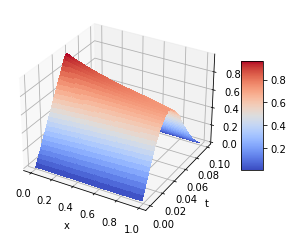

In [17]:
sol2.plot2d()

In [15]:
n = 100
func = np.zeros((n,n))
ax1 = np.linspace(sol.area_lims[0,0], sol.area_lims[0,1], n, endpoint=False)
ax2 = np.linspace(sol.area_lims[1,0], sol.area_lims[1,1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[i, j] = sol.eval([ax1[i], ax2[j]], [0,0])

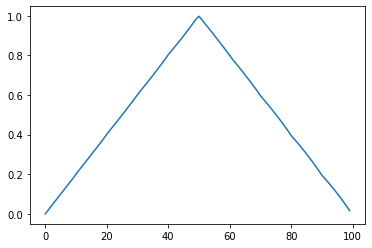

In [101]:
plt.plot(func[0,:])

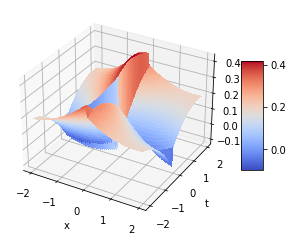

In [7]:
def generate_sys(h_points, h_pow, phi, rho):
    
    def f(x):
        return 0
    
    phi_pow = h_pow

    h_mat_l = np.zeros((h_pow, h_pow))
    phi_h_mat_l = np.zeros((phi_pow, phi_pow))

    h_mat = np.zeros((len(h_points),h_pow* h_pow))
    phi_h_mat = np.zeros((len(h_points),phi_pow* phi_pow))

    right_side_h = np.zeros(len(h_points))
    right_side_phi = np.zeros(len(h_points))

    for point_num in range(len(h_points)):
        point = h_points[point_num]
        t, x = point

        PHI = lambda der: phi.eval(point=point, derivatives=der)
        RHO = lambda der: rho.eval(point=point, derivatives=der)
        
        for i in range(1,h_pow):
            for j in range(h_pow-i):
                if i > 1:
                    h_mat_l[i, j] = i * RHO([0,0])**j * \
                        (RHO([0,1])*(1+j)*PHI([0,1])**(i-1) + (i-1)*RHO([0,0])*PHI([0,2])*PHI([0,1])**(i-2))
                else:
                    h_mat_l[i, j] = RHO([0,0])**j * RHO([0,1])*(1+j)
                #h_mat_l[i, j] =   #i*(PHI( [0,1]))**(i-2) * RHO(, [0,0])**j * \
                    #( (i-1)*(PHI( [0,2]))**(i-1) * RHO(, [0,0])**j + (PHI( [0,2]))**(i) * RHO(, [0,1])**(j+1))
        h_mat[point_num] = copy.deepcopy(h_mat_l.ravel())
        # print(h_mat[point_num])
        
        right_side_h[point_num] = f(point) + RHO([1,0]) - eps * RHO([0,2])

        for i in range(h_pow):
            for j in range(h_pow-i):
                # phi_phi_mat_l[i, j] =  -(j*(x**i * t**(j-1)))
                # if i > 1:
                #     phi_phi_mat_l[i, j] -=  eps * i*(i-1)*x**(i-2) * t**j
                
                phi_h_mat_l[i,j] = PHI([0,1])**i * RHO([0,0])**j
        # phi_phi_mat[point_num] = copy.deepcopy(phi_phi_mat_l.ravel())
        phi_h_mat[point_num] = copy.deepcopy(phi_h_mat_l.ravel())
        
        right_side_phi[point_num] = PHI([1,0]) + eps * PHI([0,2])
    
    mat = np.zeros((2*len(h_points), h_pow*h_pow))
    mat[:len(h_points), :h_pow*h_pow] = h_mat
    mat[len(h_points):, :h_pow*h_pow] = phi_h_mat
    
    right_side = np.zeros((2*len(h_points)))
    right_side[:len(h_points)] = right_side_h
    right_side[len(h_points):] = right_side_phi

    return mat, right_side

h_pow = 3

from qr_solver import QR_solve

# n_points = 4*h_pow
num_of_ps = 4*h_pow

p_2 = (f_collocation_points(num_of_ps).reshape(num_of_ps+1) + 1) /2 /1
p_1 = (f_collocation_points(num_of_ps).reshape(num_of_ps+1) + 1) /2 /10

h_points = np.array(list(itertools.product(p_1, p_2)))

# h_points = colloc_points

inds = [list(range(size)) for size in sol.dim_sizes]
all_cells = list(itertools.product(*inds))
cell_shape = tuple([sol.power]*sol.n_dims)
# new_cell_coefs = copy.deepcopy(self.cells_coefs)

H_params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 1]),
    'area_lims': np.array([[-2,2], [-2,2]]),
    'power': h_pow,
    'basis': Basis(h_pow),
}
H = Solution(**H_params)
H.cells_coefs *= 0


for iter in range(1):
    # for cell in all_cells:
    # print(cell)
    mat, right_side = generate_sys(h_points=h_points, h_pow=h_pow,phi=phi, rho=rho)
    
    x = QR_solve(mat, right_side)
    # x = QR_solve(mat[int(n_points+1)**2:], right_side[int(n_points+1)**2:])
    # x = QR_solve(mat[:int(n_points+1)**2], right_side[:int(n_points+1)**2])
    x[np.abs(x) > 1e9] = 0
    h_coefs = x[:h_pow**2].reshape((h_pow, h_pow))
    # phi_coefs = x[h_pow**2:].reshape((h_pow, h_pow))
    # phi.cells_coefs[cell] = phi_coefs
        
    H.cells_coefs[0,0] = h_coefs
H.plot2d(n=100)

In [9]:
H.area_lims[:,0]

array([-2, -2])

In [ ]:
h_pow = 4
phi_pow = h_pow

h_mat_l = np.zeros((h_pow, h_pow))
phi_phi_mat_l = np.zeros((phi_pow, phi_pow))
phi_h_mat_l = np.zeros((phi_pow, phi_pow))

p_1 = (f_collocation_points(2*h_pow).reshape(2*h_pow+1) + 1) /2
p_2 = (f_collocation_points(2*h_pow).reshape(2*h_pow+1) + 1) /20

h_points = np.array(list(itertools.product(p_2, p_1)))
h_mat = np.zeros((len(h_points),h_pow* h_pow))

phi_phi_mat = np.zeros((len(h_points),phi_pow* phi_pow))
phi_h_mat = np.zeros((len(h_points),phi_pow* phi_pow))

right_side_h = np.zeros(len(h_points))
right_side_phi = np.zeros(len(h_points))

def f(x):
    return 0


for iters in range(1):
    for point_num in range(len(h_points)):
        point = h_points[point_num]
        for i in range(2,h_pow):
            for j in range(h_pow):
                h_mat_l[i, j] =   i*(phi.eval(point, [0,1]))**(i-2) * rho.eval(point, [0,0])**j * \
                    ( (i-1)*(phi.eval(point, [0,2]))**(i-1) * rho.eval(point, [0,0])**j + (phi.eval(point, [0,2]))**(i) * rho.eval(point, [0,1])**(j+1))
        h_mat[point_num] = copy.deepcopy(h_mat_l.ravel())
        # print(h_mat[point_num])

        right_side_h[point_num] = (f(point) - rho.eval(point, [1,0]) + eps * rho.eval(point, [0,2]))

    for point_num in range(len(h_points)):
        point = h_points[point_num]
        t, x = point
        for i in range(h_pow):
            for j in range(h_pow):
                phi_phi_mat_l[i, j] =  -(j*(x**i * t**(j-1) + eps * i*(i-1)*x**(i-2) * t**j))
                phi_h_mat_l[i,j] = phi.eval(point,[0,1])**i * rho.eval(point, [0,0])**j
        phi_phi_mat[point_num] = copy.deepcopy(phi_phi_mat_l.ravel())
        phi_h_mat[point_num] = copy.deepcopy(phi_h_mat_l.ravel())
        right_side_phi[point_num] = 0
    
    mat = np.zeros((2*len(h_points), 2*h_pow*h_pow))
    mat[:len(h_points), :h_pow*h_pow] = h_mat
    mat[len(h_points):, :h_pow*h_pow] = phi_h_mat
    mat[len(h_points):, h_pow*h_pow:] = phi_phi_mat

    right_side = np.zeros((2*len(h_points)))
    right_side[:len(h_points)] = right_side_h
    right_side[len(h_points):] = right_side_phi

In [38]:
def generate_sys(h_points, h_pow, phi, rho):
    def f(x):
        return 0
    phi_pow = h_pow

    h_mat_l = np.zeros((h_pow, h_pow))
    phi_phi_mat_l = np.zeros((phi_pow, phi_pow))
    phi_h_mat_l = np.zeros((phi_pow, phi_pow))

    h_mat = np.zeros((len(h_points),h_pow* h_pow))

    phi_phi_mat = np.zeros((len(h_points),phi_pow* phi_pow))
    phi_h_mat = np.zeros((len(h_points),phi_pow* phi_pow))

    

    right_side_h = np.zeros(len(h_points))
    right_side_phi = np.zeros(len(h_points))

    # for cell_num in all_cells:
    PHI = lambda der: phi.eval(point, der)
    RHO = lambda der: rho.eval(point, der)

    for point_num in range(len(h_points)):
        point = h_points[point_num]
        t, x = point
        for i in range(1,h_pow):
            for j in range(h_pow-i):
                if i > 1:
                    h_mat_l[i, j] = i*PHI([0,1])**(i-2) * RHO([0,0])**j * \
                        (RHO([0,1])*PHI([0,1])*(1+j) + (i-1)*RHO([0,0])*PHI([0,1])*PHI([0,2]))
                #h_mat_l[i, j] =   #i*(PHI( [0,1]))**(i-2) * RHO(, [0,0])**j * \
                    #( (i-1)*(PHI( [0,2]))**(i-1) * RHO(, [0,0])**j + (PHI( [0,2]))**(i) * RHO(, [0,1])**(j+1))
        h_mat[point_num] = copy.deepcopy(h_mat_l.ravel())
        # print(h_mat[point_num])
        
        right_side_h[point_num] = f(point) - RHO( [1,0]) + eps * RHO( [0,2])

        for i in range(h_pow):
            for j in range(h_pow-i):
                phi_phi_mat_l[i, j] =  -(j*(x**i * t**(j-1)))
                if i > 1:
                    phi_phi_mat_l[i, j] -=  eps * i*(i-1)*x**(i-2) * t**j
                phi_h_mat_l[i,j] = PHI([0,1])**i * RHO( [0,0])**j
        phi_phi_mat[point_num] = copy.deepcopy(phi_phi_mat_l.ravel())
        phi_h_mat[point_num] = copy.deepcopy(phi_h_mat_l.ravel())
        right_side_phi[point_num] = 0
    
    mat = np.zeros((2*len(h_points), 2*h_pow*h_pow))
    mat[:len(h_points), :h_pow*h_pow] = h_mat
    mat[len(h_points):, :h_pow*h_pow] = phi_h_mat
    mat[len(h_points):, h_pow*h_pow:] = phi_phi_mat

    right_side = np.zeros((2*len(h_points)))
    right_side[:len(h_points)] = right_side_h
    right_side[len(h_points):] = right_side_phi

    return mat, right_side

h_pow = power

from qr_solver import QR_solve

num_of_ps = 4*h_pow

p_1 = (f_collocation_points(num_of_ps).reshape(num_of_ps+1) + 1) /2 /1
p_2 = (f_collocation_points(num_of_ps).reshape(num_of_ps+1) + 1) /2 /10

h_points = np.array(list(itertools.product(p_2, p_1)))

inds = [list(range(size)) for size in sol.dim_sizes]
all_cells = list(itertools.product(*inds))
cell_shape = tuple([sol.power]*sol.n_dims)
# new_cell_coefs = copy.deepcopy(self.cells_coefs)

for iter in range(1):
    print(cell)
    mat, right_side = generate_sys(h_points, h_pow, phi=phi, rho=rho)
    x = QR_solve(mat, right_side)
    x[np.abs(x) > 1e5] = 0
    h_coefs = x[:h_pow**2].reshape((h_pow, h_pow))
    phi_coefs = x[h_pow**2:].reshape((h_pow, h_pow))

    phi.cells_coefs[cell] = phi_coefs
    H.cells_coefs[cell] = h_coefs

(0, 0)


In [54]:
def generate_sys(h_points, h_pow, cell_num, phi, rho, H):
    
    def f(x):
        return 0
    
    phi_pow = h_pow

    h_mat_l = np.zeros((h_pow, h_pow))
    phi_h_mat_l = np.zeros((phi_pow, phi_pow))

    h_mat = np.zeros((len(h_points),h_pow* h_pow))
    phi_h_mat = np.zeros((len(h_points),phi_pow* phi_pow))

    right_side_h = np.zeros(len(h_points))
    right_side_phi = np.zeros(len(h_points))

    for point_num in range(len(h_points)):
        point = h_points[point_num]
        t, x = point

        PHI = lambda der: phi.eval(point=point, derivatives=der, cell_num=cell_num, local=True)
        RHO = lambda der: rho.eval(point=point, derivatives=der, cell_num=cell_num, local=True)
        
        for i in range(1,h_pow):
            for j in range(h_pow-i):
                if i > 1:
                    h_mat_l[i, j] = i * RHO([0,0])**j * \
                        (RHO([0,1])*(1+j)*PHI([0,1])**(i-1) + (i-1)*RHO([0,0])*PHI([0,2])*PHI([0,1])**(i-2))
                else:
                    h_mat_l[i, j] = RHO([0,0])**j * RHO([0,1])*(1+j)
                #h_mat_l[i, j] =   #i*(PHI( [0,1]))**(i-2) * RHO(, [0,0])**j * \
                    #( (i-1)*(PHI( [0,2]))**(i-1) * RHO(, [0,0])**j + (PHI( [0,2]))**(i) * RHO(, [0,1])**(j+1))
        h_mat[point_num] = copy.deepcopy(h_mat_l.ravel())
        # print(h_mat[point_num])
        
        right_side_h[point_num] = f(point) + RHO([1,0]) - eps * RHO([0,2])

        for i in range(h_pow):
            for j in range(h_pow-i):
                # phi_phi_mat_l[i, j] =  -(j*(x**i * t**(j-1)))
                # if i > 1:
                #     phi_phi_mat_l[i, j] -=  eps * i*(i-1)*x**(i-2) * t**j
                
                phi_h_mat_l[i,j] = PHI([0,1])**i * RHO([0,0])**j
        # phi_phi_mat[point_num] = copy.deepcopy(phi_phi_mat_l.ravel())
        phi_h_mat[point_num] = copy.deepcopy(phi_h_mat_l.ravel())
        
        right_side_phi[point_num] = PHI([1,0]) + eps * PHI([0,2])
    
    mat = np.zeros((2*len(h_points), h_pow*h_pow))
    mat[:len(h_points), :h_pow*h_pow] = h_mat
    mat[len(h_points):, :h_pow*h_pow] = phi_h_mat
    
    right_side = np.zeros((2*len(h_points)))
    right_side[:len(h_points)] = right_side_h
    right_side[len(h_points):] = right_side_phi

    return mat, right_side


h_pow = power

from qr_solver import QR_solve

n_points = power
c_p_1d = f_collocation_points(n_points).reshape(n_points+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
h_points = colloc_points

inds = [list(range(size)) for size in sol.dim_sizes]
all_cells = list(itertools.product(*inds))
cell_shape = tuple([sol.power]*sol.n_dims)
# new_cell_coefs = copy.deepcopy(self.cells_coefs)

for iter in range(1):
    for cell in all_cells:
        print(cell)
        mat, right_side = generate_sys(h_points=h_points, h_pow=h_pow, cell_num=cell,phi=phi, rho=rho, H=H)

        x = QR_solve(mat, right_side)
        
        # x = QR_solve(mat[int(n_points+1)**2:], right_side[int(n_points+1)**2:])
        # x = QR_solve(mat[:int(n_points+1)**2], right_side[:int(n_points+1)**2])
        x[np.abs(x) > 1e9] = 0
        h_coefs = x[:h_pow**2].reshape((h_pow, h_pow))
        # phi_coefs = x[h_pow**2:].reshape((h_pow, h_pow))
        # phi.cells_coefs[cell] = phi_coefs
        H.cells_coefs[cell] = h_coefs
H.plot2d(n=10*power)

(0, 0)
(0, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [28]:
from solution import Solution
from basis import Basis
import itertools
import numpy as np

power = 4

def dir(point: np.array) -> np.array:
            direction = (np.abs(point) == 1) * (np.sign(point)) 
            return np.array(direction, dtype=int)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

params = {
    'n_dims': 2,
    'dim_sizes': np.array([1, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}


connect_points = np.array([[-1, 0.5], #[1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], #[1, -0.5],
                            [-0.5, -1], [-0.5, 1],])

border_points = connect_points

w = (sol.steps[0]/2)

eps = 0.1
# def phi(point):
#     t,x = point
#     return x**2

# def phi_x(point):
#     t,x = point
#     return 2*x

def H_q(phi):
    return H.eval([phi,0], [0,0])

def H_q_x(phi):
    return H.eval([phi,0], [0,1]) + H.eval([0,phi], [1,0])


colloc_left_operators = [lambda u_loc, u_bas, x, x_loc: (u_bas([1,0]) - eps * u_bas([0,2]) - H_q(phi.eval(x, [0,1]))*u_bas([0,1]) - H_q_x(phi.eval(x, [0,1])) * phi.eval(x, [0,2]) * u_bas([0,0])) * w*2]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]


border_weight = 100
border_left_operators = [lambda _, u_bas, x, x_loc: u_bas([0,0]) * border_weight, 
                            # lambda _, u_bas, x, x_loc: u_bas([1,0]) * w
                            ]

def initial_state(point):
    t, x = point
    if x < 0.5:
        return 2*(x)
    else:
        return 2*(1-x)

border_right_operators = [lambda u, _, x, x_loc: 0 + int(x[0]==0) * initial_state(x) * border_weight,
                            # lambda u, _, x, x_loc: 0 * w
                            ]
border_ops = [border_left_operators, border_right_operators]

points = (colloc_points, connect_points, border_points)

connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)) + np.sum(dir(x_loc)) * u_bas(dir(x_loc)) * w,
                        lambda _, u_bas, x, x_loc: u_bas(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_bas(3*dir(x_loc))* w**3
                        ]
connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)) + np.sum(dir(x_loc))*u_nei(dir(x_loc))* w,
                            lambda _, u_nei, x, x_loc: u_nei(2*dir(x_loc))* w**2 + np.sum(dir(x_loc)) * u_nei(3*dir(x_loc))* w**3]

# connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)),
#                         lambda _, u_bas, x, x_loc: u_bas(dir(x_loc))* w
#                         ]
# connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)),
#                             lambda _, u_nei, x, x_loc: u_nei(dir(x_loc))* w]
                            
connect_ops = [connect_left_operators, connect_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'connect_ops':connect_ops}
sol2 = Solution(**params)
sol2.solve(verbose = True, **iteration_dict)

0.5613950419463472
0.417354363791031
0.101016674622731
0.02606696661042131
0.006856472122182891
0.0013062257242943062
0.00036010332366260417
5.7391601840678375e-05
1.4170616065485933e-05
3.5425639212677967e-06
1.2660727413821293e-06
2.144926731367791e-07
6.081597412384981e-08
8.264513386146977e-09
1.611918484974162e-09
2.2560757775846874e-10
2.6081921344900394e-11
Iterations to converge:  16


In [56]:
list(range(999, 5000, 1000))

[999, 1999, 2999, 3999, 4999]